In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv("../data/ai4i2020.csv")

In [3]:
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Checking for null values and duplicates

# Shape Analysis

In [4]:
df = data.copy()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Machine failure                2
TWF                            2
HDF                            2
PWF                            2
OSF                            2
RNF                            2
dtype: int64

In [7]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

# In-depth Analysis

In [8]:
df = df.drop(["UDI", "Product ID"], axis=1)
df = df.drop(["TWF", "HDF", "PWF", "OSF", "RNF"], axis=1)
df

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


## Target Visualization

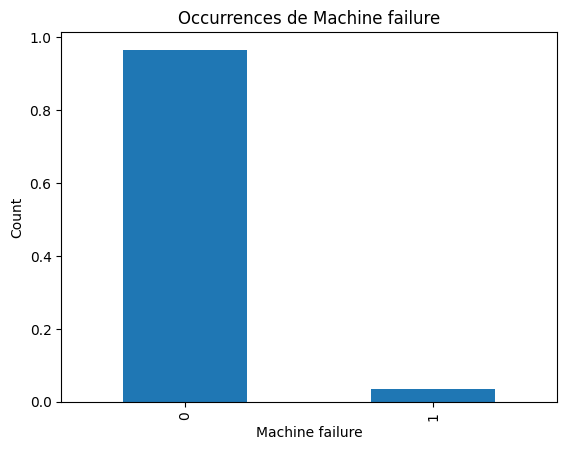

In [9]:
df['Machine failure'].value_counts(normalize=True).plot(kind='bar')
plt.xlabel('Machine failure')
plt.ylabel('Count')
plt.title('Occurrences de Machine failure')
plt.show()


In [10]:
df['Machine failure'].value_counts(normalize=True)

Machine failure
0    0.9661
1    0.0339
Name: proportion, dtype: float64

## Univariate analysis

In [11]:
variables_continuous = ["Air temperature [K]", "Process temperature [K]", "Rotational speed [rpm]", "Torque [Nm]", "Tool wear [min]"]

count    10000.000000
mean       300.004930
std          2.000259
min        295.300000
25%        298.300000
50%        300.100000
75%        301.500000
max        304.500000
Name: Air temperature [K], dtype: float64


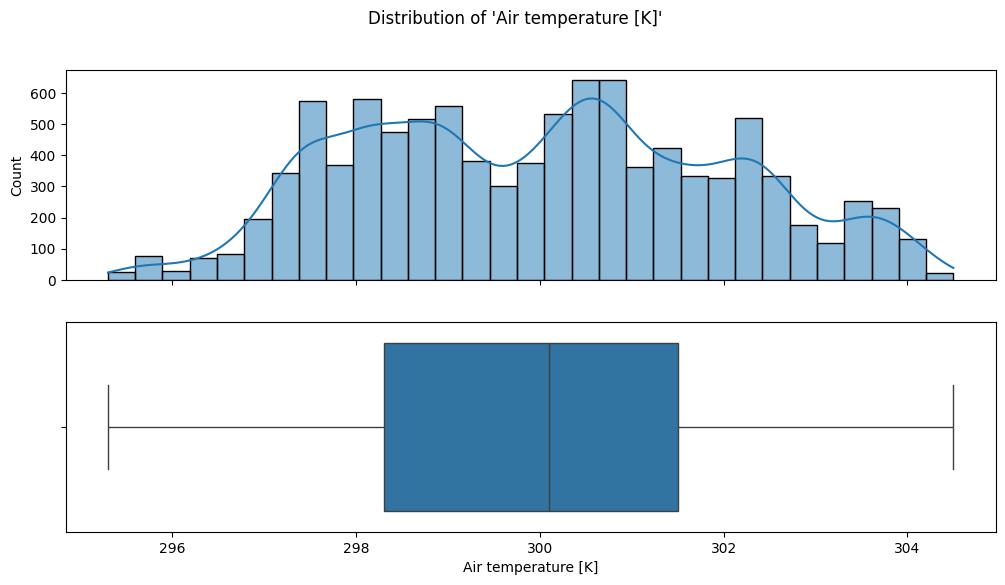

count    10000.000000
mean       310.005560
std          1.483734
min        305.700000
25%        308.800000
50%        310.100000
75%        311.100000
max        313.800000
Name: Process temperature [K], dtype: float64


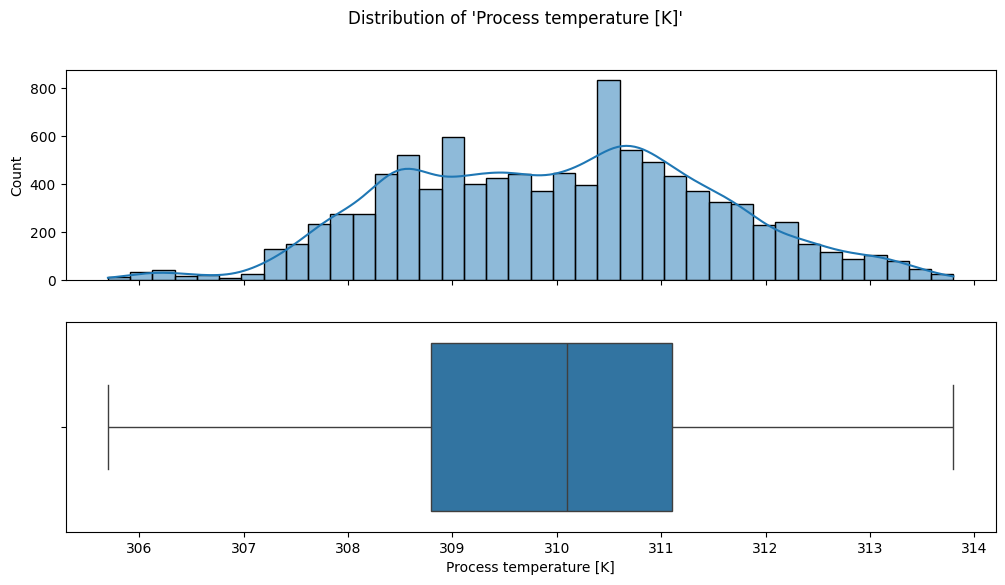

count    10000.000000
mean      1538.776100
std        179.284096
min       1168.000000
25%       1423.000000
50%       1503.000000
75%       1612.000000
max       2886.000000
Name: Rotational speed [rpm], dtype: float64


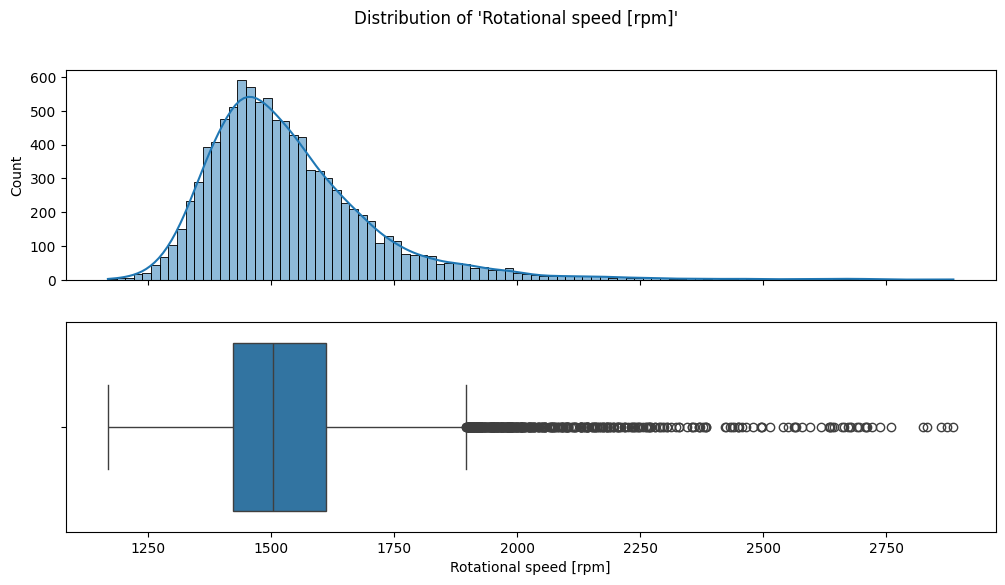

count    10000.000000
mean        39.986910
std          9.968934
min          3.800000
25%         33.200000
50%         40.100000
75%         46.800000
max         76.600000
Name: Torque [Nm], dtype: float64


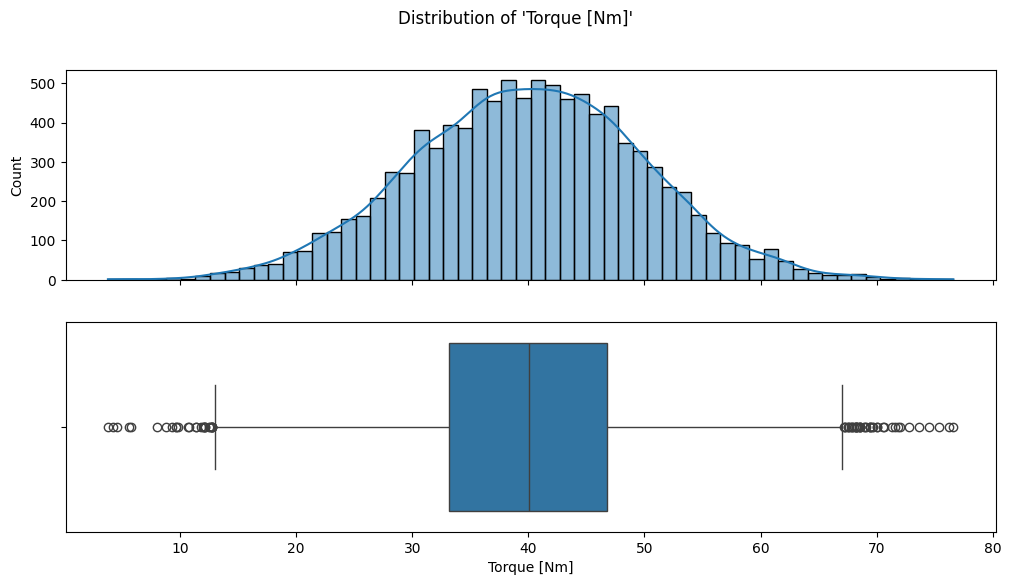

count    10000.000000
mean       107.951000
std         63.654147
min          0.000000
25%         53.000000
50%        108.000000
75%        162.000000
max        253.000000
Name: Tool wear [min], dtype: float64


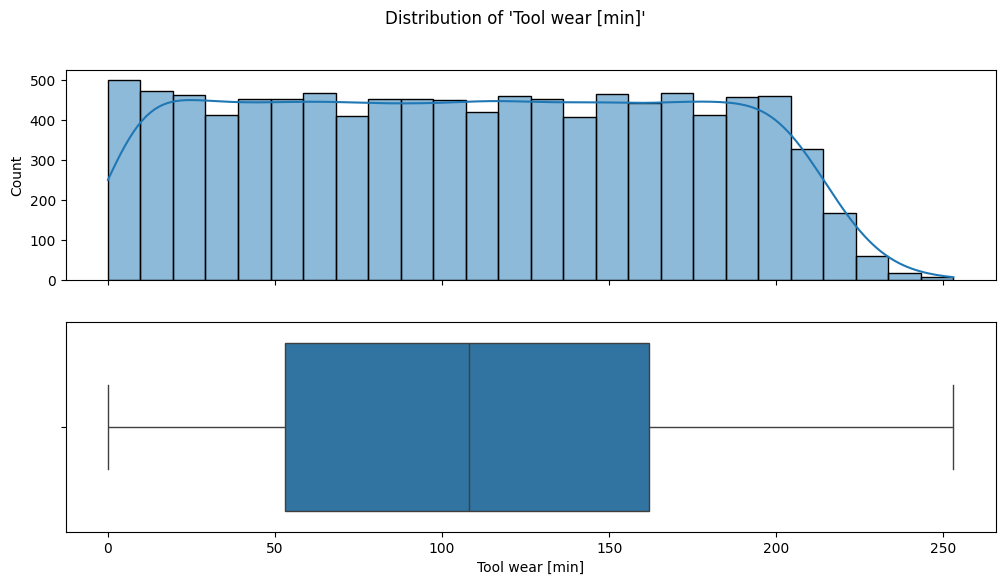

In [27]:
for variable in variables_continuous:
    fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)
    
    # Graphiques (aucune modification ici)
    sns.histplot(data=df, x=variable, kde=True,ax=ax[0])
    sns.boxplot(data=df, x=variable, ax=ax[1])
    plt.suptitle(f"Distribution of '{variable}'")

    print(df[variable].describe())

    plt.show()

## Discret Variable

In [13]:
df["Type"].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

<Axes: xlabel='Type'>

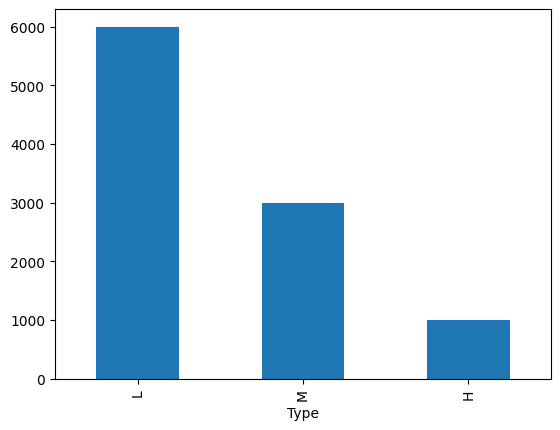

In [14]:
df["Type"].value_counts().plot(kind="bar")

## Target / Variables Relation

### Visualizing Failure Distribution Across Product Types

In [15]:
pd.crosstab(df["Type"], df["Machine failure"], normalize=True)

Machine failure,0,1
Type,,
H,0.0982,0.0021
L,0.5765,0.0235
M,0.2914,0.0083


In [16]:
pd.crosstab(df["Type"], df["Machine failure"])

Machine failure,0,1
Type,,
H,982,21
L,5765,235
M,2914,83


Text(0.5, 0.98, 'Machine Failure Distribution Across Types')

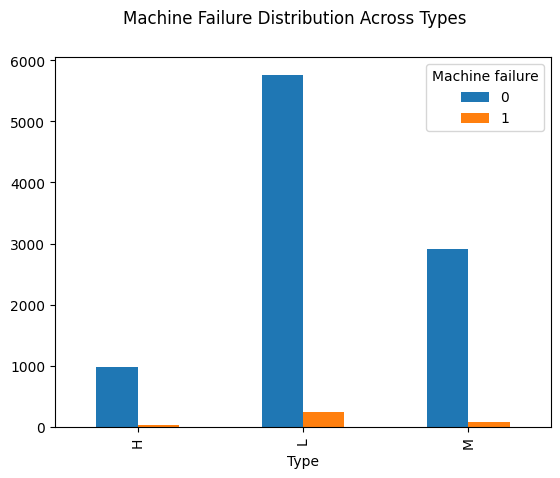

In [17]:
pd.crosstab(df["Type"], df["Machine failure"]).plot(kind="bar")
plt.suptitle('Machine Failure Distribution Across Types')

### Pairplot for Feature Relationships

### Feature engineering

In [18]:
df['power_machine'] = df['Torque [Nm]'] * (  3.14 * df['Rotational speed [rpm]'] / 30 )
df['temp_diff'] = df['Process temperature [K]'] - df['Air temperature [K]']

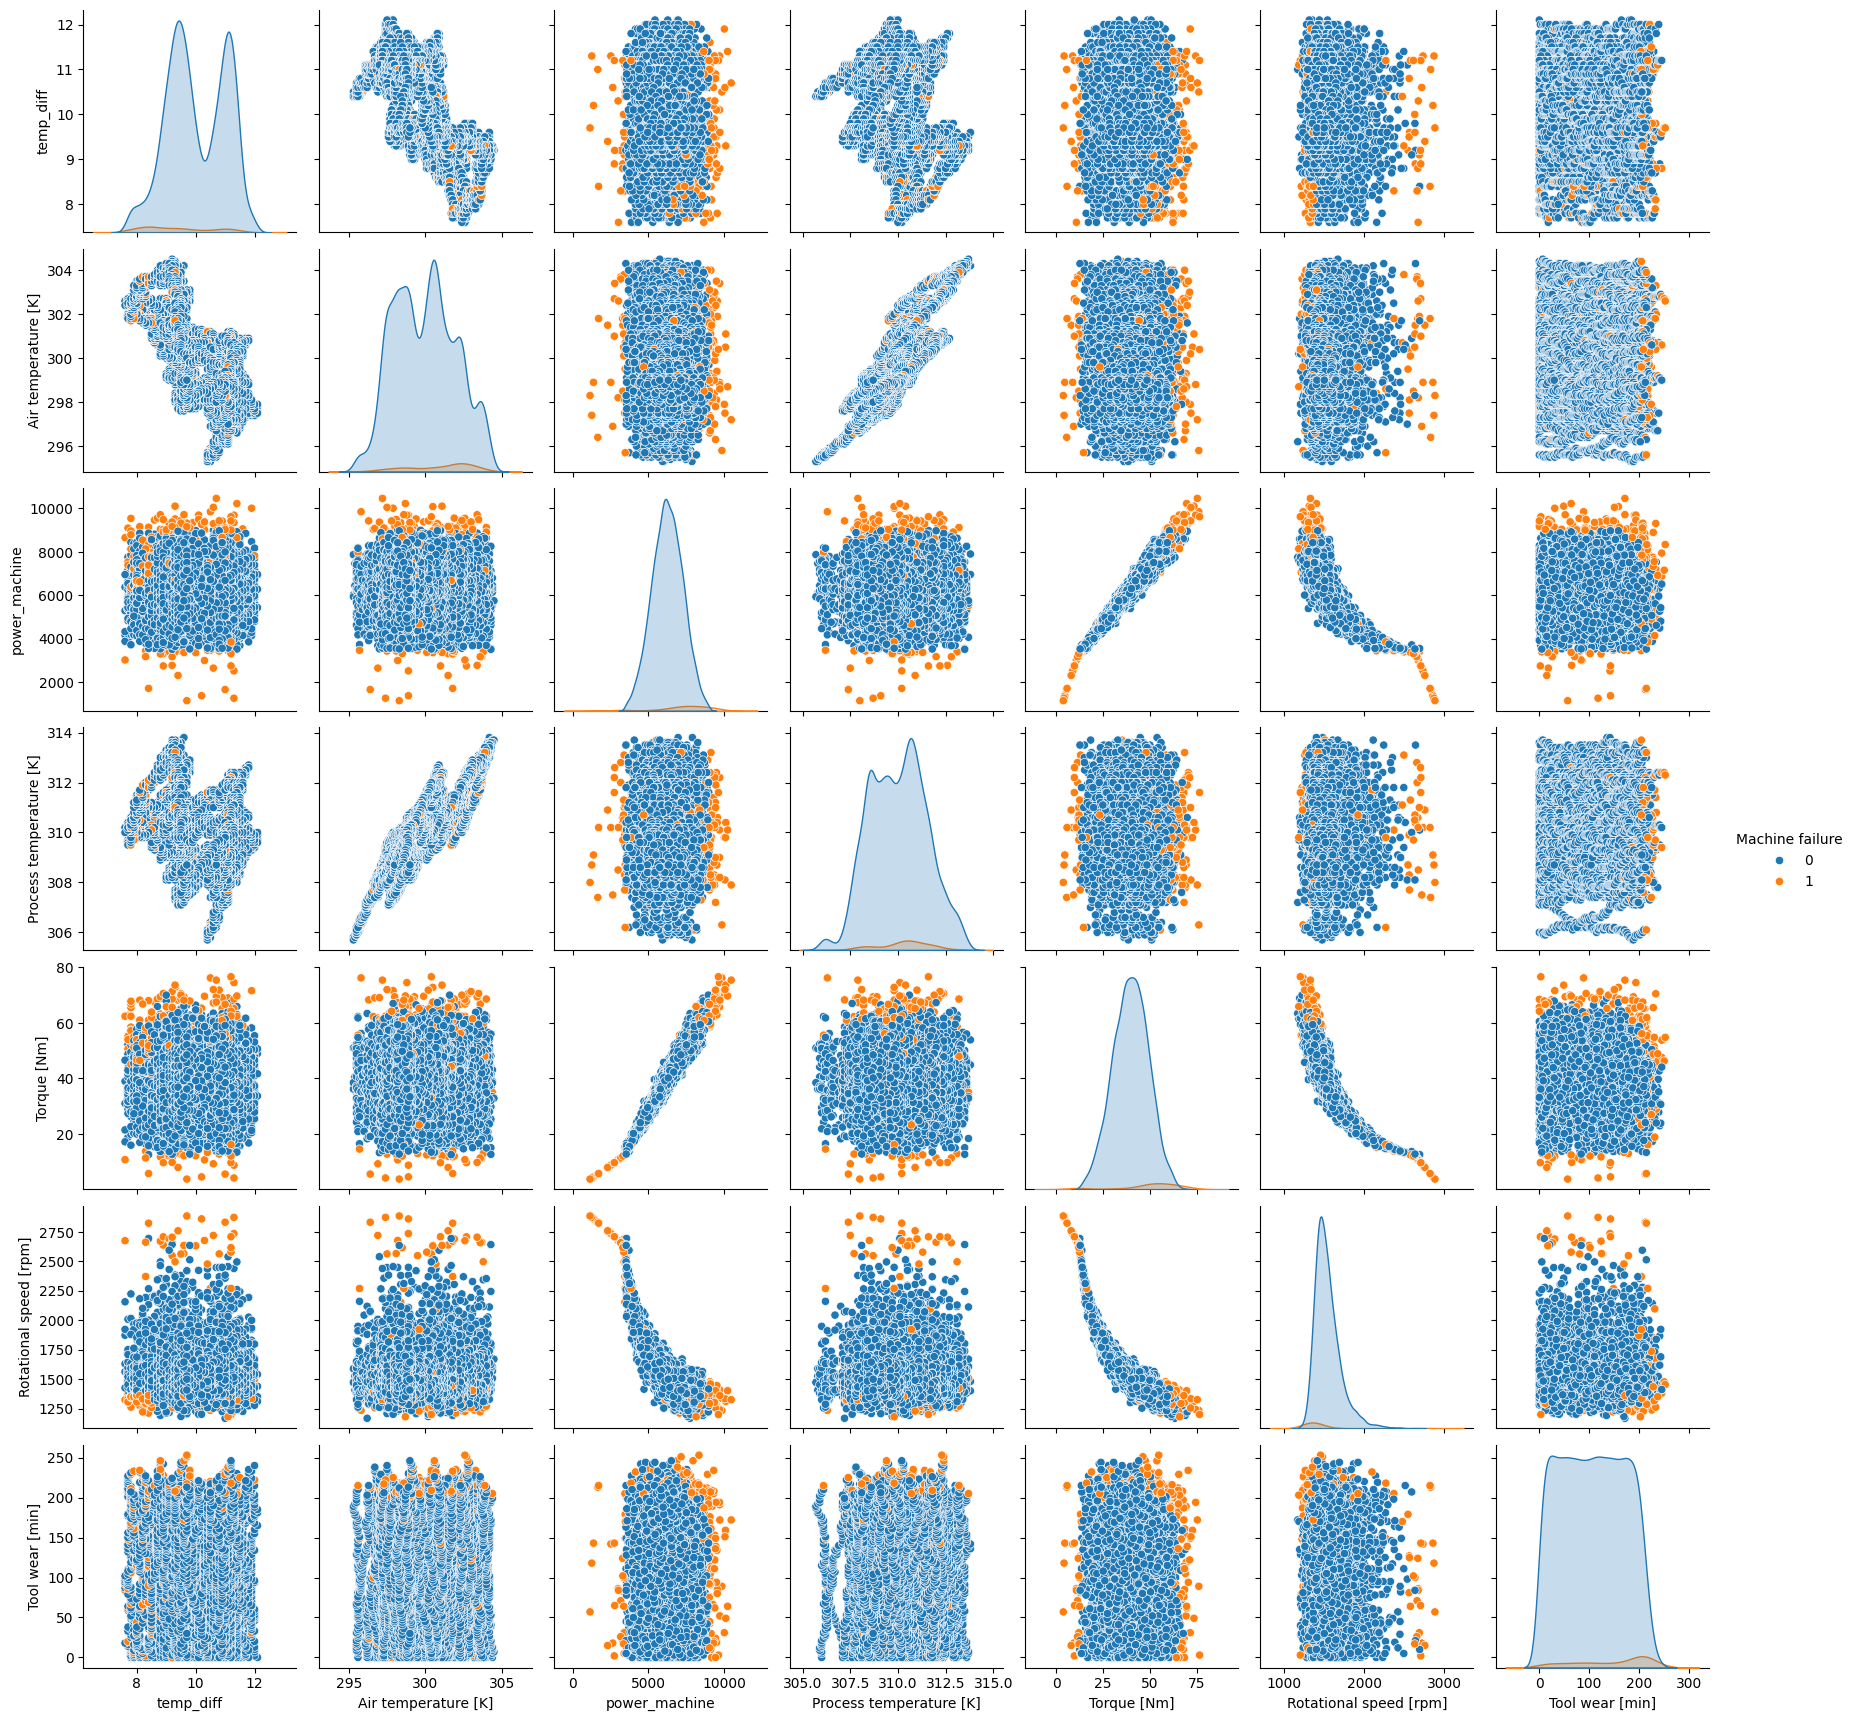

In [19]:
sns.pairplot(df[['temp_diff','Air temperature [K]','power_machine', 'Process temperature [K]', 'Torque [Nm]', 'Rotational speed [rpm]','Tool wear [min]', 'Machine failure']], hue='Machine failure')
plt.show()

<Axes: >

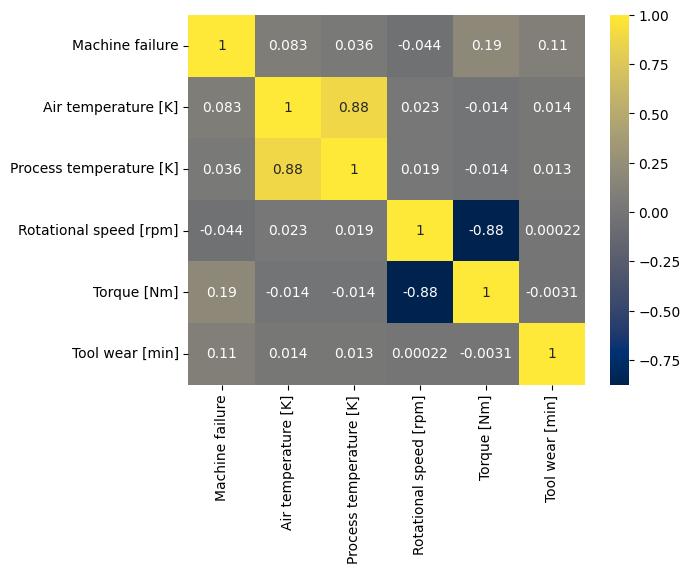

In [20]:
sns.heatmap(df[['Machine failure'] + variables_continuous].corr(), annot=True, cmap="cividis")

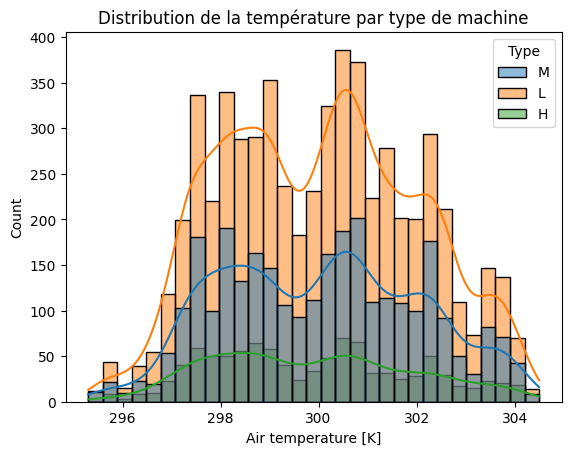

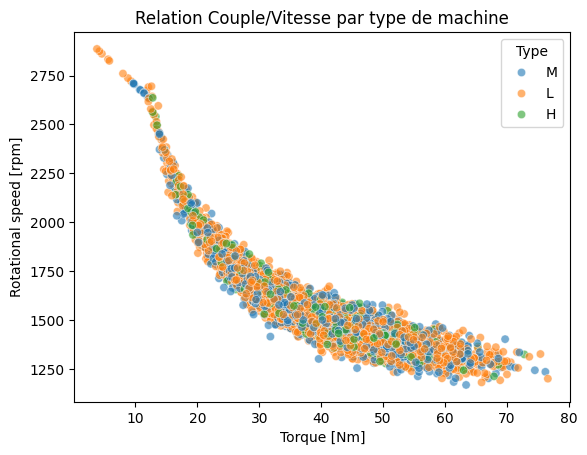

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogramme de la température, séparé par type de machine
sns.histplot(data=df, x='Air temperature [K]', hue='Type', kde=True)
plt.title('Distribution de la température par type de machine')
plt.show()

# Nuage de points entre couple et vitesse, séparé par type
sns.scatterplot(data=df, x='Torque [Nm]', y='Rotational speed [rpm]', hue='Type', alpha=0.6)
plt.title('Relation Couple/Vitesse par type de machine')
plt.show()

<Axes: xlabel='Rotational speed [rpm]', ylabel='power_machine'>

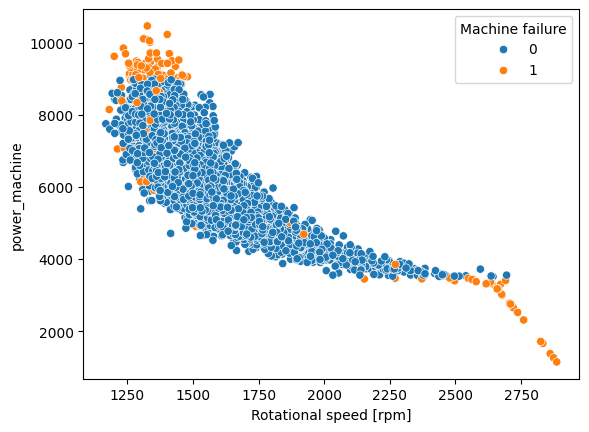

In [22]:
sns.scatterplot(data=df, x='Rotational speed [rpm]', y='power_machine', hue='Machine failure')

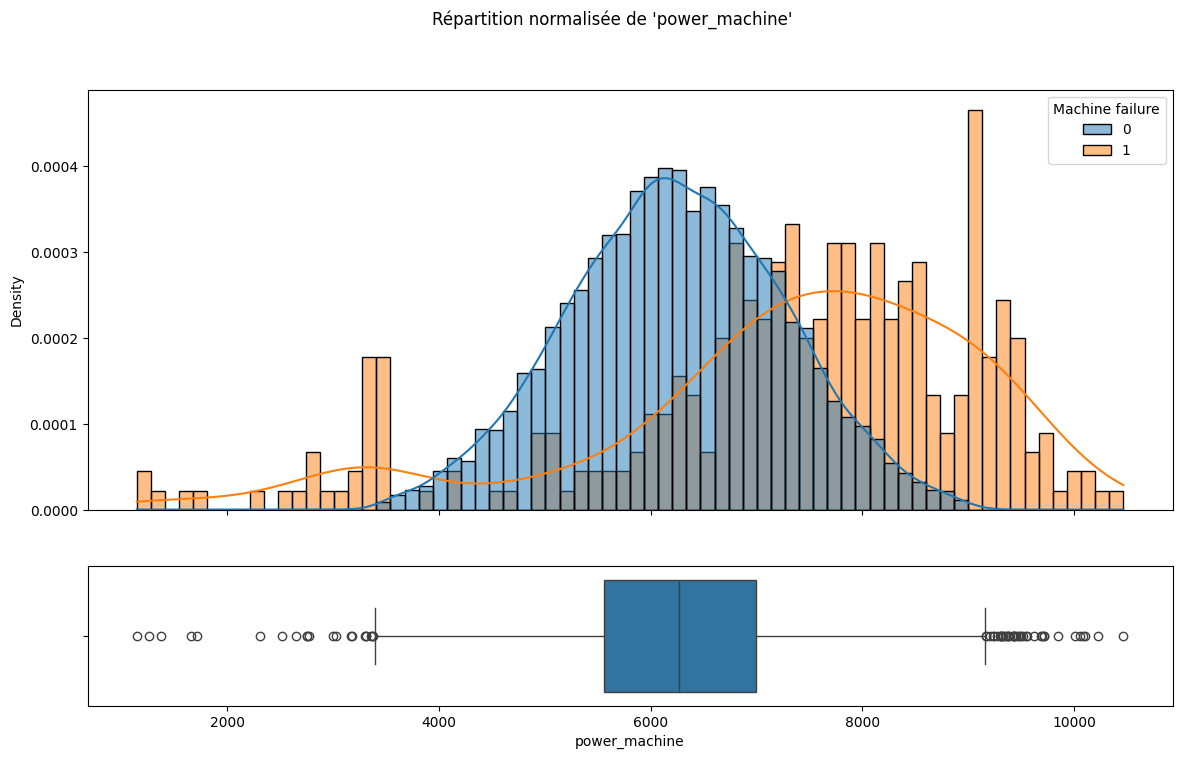

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- MODIFICATION ICI ---
# On utilise stat='density' et common_norm=False
sns.histplot(data=df, x='power_machine', hue='Machine failure', stat='density', common_norm=False, kde=True, ax=ax[0])

# Le boxplot reste le même
sns.boxplot(data=df, x='power_machine', ax=ax[1])

plt.suptitle("Répartition normalisée de 'power_machine'")
plt.show()

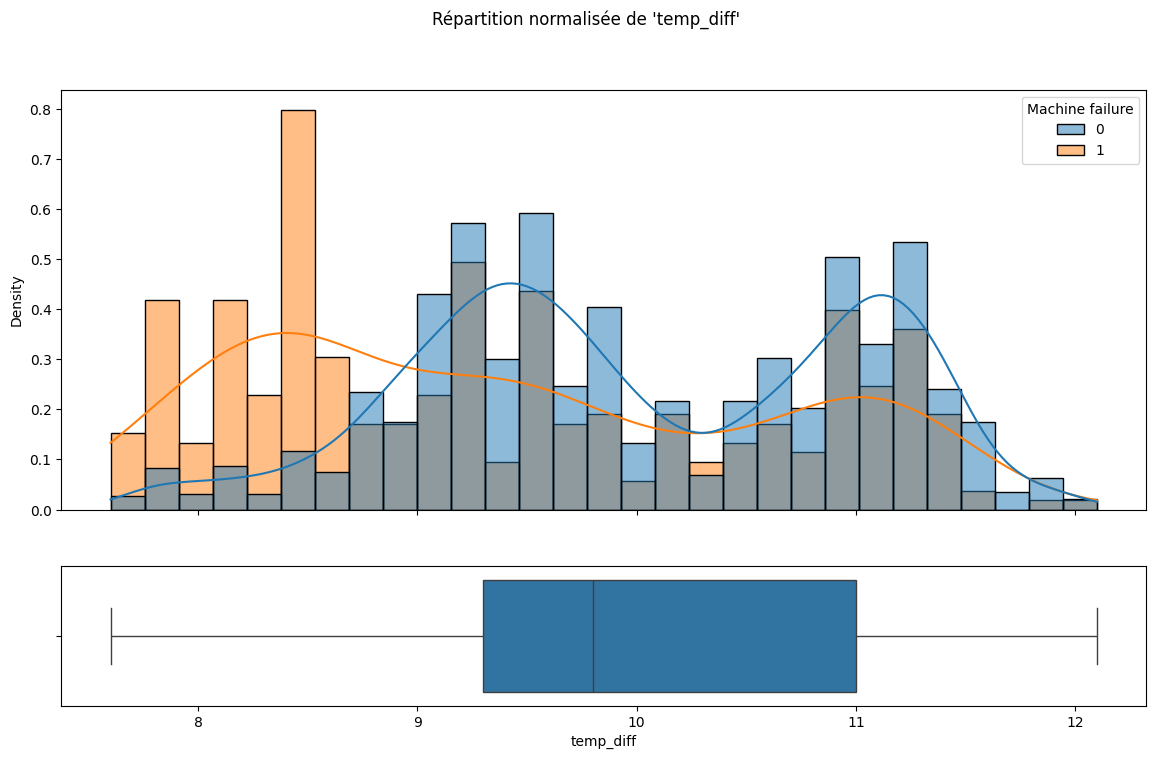

In [24]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- MODIFICATION ICI ---
# On utilise stat='density' et common_norm=False
sns.histplot(data=df, x='temp_diff', hue='Machine failure', stat='density', common_norm=False, kde=True, ax=ax[0])

# Le boxplot reste le même
sns.boxplot(data=df, x='temp_diff', ax=ax[1])

plt.suptitle("Répartition normalisée de 'temp_diff'")
plt.show()

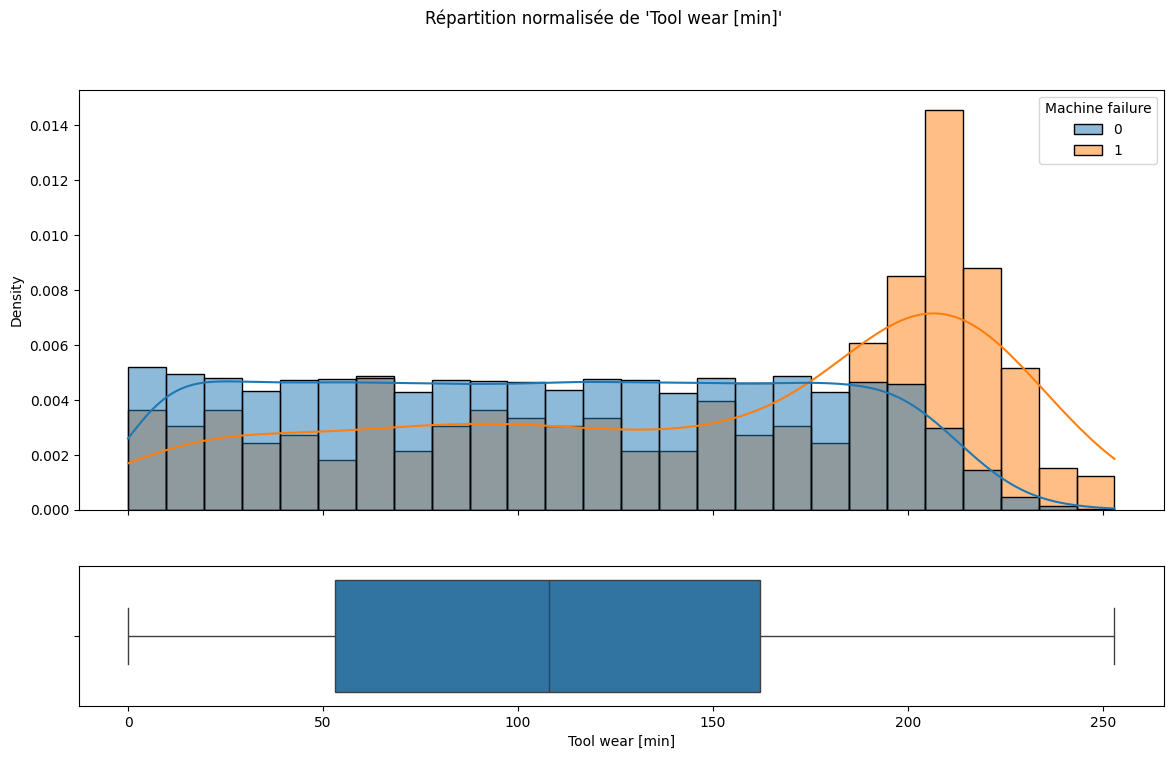

In [25]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

# --- MODIFICATION ICI ---
# On utilise stat='density' et common_norm=False
sns.histplot(data=df, x='Tool wear [min]', hue='Machine failure', stat='density', common_norm=False, kde=True, ax=ax[0])

# Le boxplot reste le même
sns.boxplot(data=df, x='Tool wear [min]', ax=ax[1])

plt.suptitle("Répartition normalisée de 'Tool wear [min]'")
plt.show()